In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

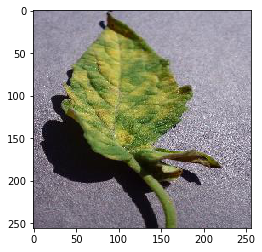

In [2]:
img=cv2.imread('Plant Disease/train/Tomato___Leaf_Mold/447ca40f-8640-43d7-b7af-3372e8afbfba___Crnl_L.Mold 8870.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

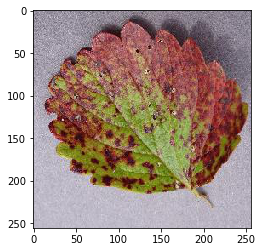

In [3]:
img=cv2.imread('Plant Disease/test/Strawberry___Leaf_scorch/7cd20e89-51cc-46ef-a34e-33bac0fcfae3___RS_L.Scorch 0959.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
img.shape

(256, 256, 3)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
img_gen=ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                          horizontal_flip=True,
                          zoom_range=0.1,
                          rescale=1/255,
                          fill_mode='nearest')

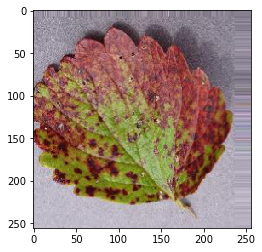

In [7]:
plt.imshow(img_gen.random_transform(img))

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout,BatchNormalization

In [9]:

model=Sequential()

shape=(256,256,3)

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=shape,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(40))

model.add(Activation('sigmoid'))

In [10]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.0005),
             metrics=['accuracy']
             )

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
__________

In [17]:

batch_size=64

train_img_gen=img_gen.flow_from_directory('Plant Disease/train',
                                 batch_size=batch_size,
                                target_size=shape[:2],
                                 class_mode='categorical')

Found 13248 images belonging to 40 classes.


In [18]:
batch_size=64

test_img_gen=img_gen.flow_from_directory('Plant Disease/test',
                                 batch_size=batch_size,
                                target_size=shape[:2],
                                class_mode='categorical')

Found 9663 images belonging to 40 classes.


In [19]:
train_img_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Cherry_(including_sour)___Powdery_mildew': 4,
 'Cherry_(including_sour)___healthy': 5,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6,
 'Corn_(maize)___Common_rust_': 7,
 'Corn_(maize)___Northern_Leaf_Blight': 8,
 'Grape___Black_rot': 9,
 'Grape___Esca_(Black_Measles)': 10,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 11,
 'Grape___healthy': 12,
 'Orange___Haunglongbing_(Citrus_greening)': 13,
 'Orange_black_spot': 14,
 'Orange_citrus_canker': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Squash___Powdery_mildew': 23,
 'Strawberry___Leaf_scorch': 24,
 'Strawberry___healthy': 25,
 'Tea_anthracnose': 26,
 'Tea_bird_eye_spot': 27,
 'Tea_brown_blight': 28,
 'Tea_red_leaf_spot': 29,
 'Tomato___Bacterial_spot

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
results=model.fit_generator(train_img_gen,epochs=75,validation_data=test_img_gen,verbose=1)

Epoch 1/75
207/207 [==============================] - 2026s 10s/step - loss: 2.3285 - acc: 0.3481 - val_loss: 1.8394 - val_acc: 0.5146
Epoch 2/75
207/207 [==============================] - 1925s 9s/step - loss: 1.4183 - acc: 0.6097 - val_loss: 1.3271 - val_acc: 0.6116
Epoch 3/75
207/207 [==============================] - 1952s 9s/step - loss: 1.0210 - acc: 0.7074 - val_loss: 1.6422 - val_acc: 0.6145
Epoch 4/75
207/207 [==============================] - 1964s 9s/step - loss: 0.8327 - acc: 0.7597 - val_loss: 4.9751 - val_acc: 0.3602
Epoch 5/75
207/207 [==============================] - 1963s 9s/step - loss: 0.6792 - acc: 0.8003 - val_loss: 0.7970 - val_acc: 0.7832
Epoch 6/75
207/207 [==============================] - 1992s 10s/step - loss: 0.5731 - acc: 0.8290 - val_loss: 0.5501 - val_acc: 0.8309
Epoch 7/75
207/207 [==============================] - 2007s 10s/step - loss: 0.4911 - acc: 0.8442 - val_loss: 0.5873 - val_acc: 0.8304
Epoch 8/75
207/207 [==============================] - 1986s

In [22]:
results.history['acc']

[0.3481280193236715,
 0.6096769323671497,
 0.7073520531400966,
 0.7596618357487923,
 0.8002717391304348,
 0.8289553140096618,
 0.8442028985507246,
 0.8588466183574879,
 0.8699426328502415,
 0.876207729468599,
 0.882397342995169,
 0.8884359903381642,
 0.9006642512077294,
 0.8953049516908212,
 0.9060990338164251,
 0.9066274154589372,
 0.9138737922705314,
 0.9086654589371981,
 0.9142512077294686,
 0.9233846618357487,
 0.9230072463768116,
 0.9270833333333334,
 0.9270833333333334,
 0.9282155797101449,
 0.923233695652174,
 0.9291213768115942,
 0.9293478260869565,
 0.9267059178743962,
 0.930631038647343,
 0.9353109903381642,
 0.9386322463768116,
 0.9377264492753623,
 0.9317632850241546,
 0.9381793478260869,
 0.9401419082125604,
 0.9350090579710145,
 0.943161231884058,
 0.9397644927536232,
 0.9452747584541062,
 0.9415006038647343,
 0.9451992753623188,
 0.9359148550724637,
 0.9460295893719807,
 0.9487469806763285,
 0.947463768115942,
 0.9503321256038647,
 0.9510114734299517,
 0.9432367149758454

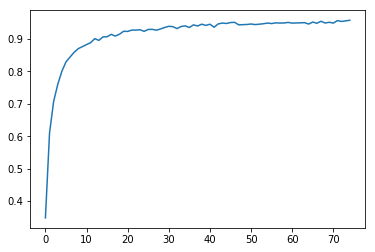

In [23]:
plt.plot(results.history['acc'])

In [27]:
model.save('Model_75.h5')

In [1]:
from keras.models import load_model

Using TensorFlow backend.
C:\Users\nilac\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nilac\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nilac\Anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nilac\An

In [2]:
new=load_model('Model.h5')

In [68]:
img='C:/Users/nilac/OneDrive/Pictures/abc.png'

In [69]:
from keras.preprocessing import image

In [70]:
img=image.load_img(img,target_size=(256,256))

In [71]:
img=image.img_to_array(img)

In [72]:
img.shape

(256, 256, 3)

In [73]:
import numpy as np
img=np.expand_dims(img,axis=0)

In [74]:
img.shape

(1, 256, 256, 3)

In [75]:
img=img/255

In [76]:
str(new.predict_classes(img))

'[16]'

In [77]:
p=new.predict(img)
p>=0.8

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False]])

In [78]:
if True not in (p[:,:]>=0.8):
    print("Not")
print("Yes")

Not
Yes
